In [1]:
#!pip install -r requirements.txt

Obtaining networkx from git+https://github.com/GiuliaMaragno/networkx.git@b77e606ecc22d30d46c7b5d4e0bd600fb48acb41#egg=networkx (from -r requirements.txt (line 120))
  Skipping because already up-to-date.


ERROR: Could not find a version that satisfies the requirement ruamel_yaml_conda>=0.11.14 (from conda==4.10.1->-r requirements.txt (line 39)) (from versions: none)
ERROR: No matching distribution found for ruamel_yaml_conda>=0.11.14 (from conda==4.10.1->-r requirements.txt (line 39))


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score

# IMPORTO I DATASET


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ESPLORO I DATASET

In [4]:
list(train)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

# analizzo i tipi di dato nel dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5199 non-null   object
 1   cap-shape                 5199 non-null   object
 2   cap-surface               5199 non-null   object
 3   cap-color                 5199 non-null   object
 4   bruises                   5199 non-null   object
 5   odor                      5199 non-null   object
 6   gill-attachment           5199 non-null   object
 7   gill-spacing              5199 non-null   object
 8   gill-size                 5199 non-null   object
 9   gill-color                5199 non-null   object
 10  stalk-shape               5199 non-null   object
 11  stalk-root                5199 non-null   object
 12  stalk-surface-above-ring  5199 non-null   object
 13  stalk-surface-below-ring  5199 non-null   object
 14  stalk-color-above-ring  

# vedo i primi 50 record per tutte le colonne

In [8]:
pd.set_option('max_columns', None)
train.head(50)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,f,f,n,f,n,f,w,b,h,t,e,s,f,w,w,p,w,o,e,k,s,g
1,p,b,y,b,t,n,f,c,b,r,e,b,s,s,w,w,p,w,t,p,r,v,m
2,p,k,s,n,f,s,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,d
3,e,x,s,n,t,n,f,c,b,w,e,b,s,s,w,w,p,w,t,p,w,v,p
4,e,f,f,w,f,n,f,w,b,n,t,e,f,f,w,w,p,w,o,e,n,a,g
5,e,x,y,g,t,n,f,c,b,n,t,b,s,s,g,w,p,w,o,p,k,y,d
6,p,x,s,g,t,f,f,c,b,p,t,b,f,f,w,w,p,w,o,p,h,s,g
7,e,f,f,g,f,n,f,w,b,n,t,e,f,f,w,w,p,w,o,e,k,a,g
8,p,x,y,y,f,f,f,c,b,g,e,b,k,k,b,b,p,w,o,l,h,y,d
9,e,x,y,g,t,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,y,d


# vedo i tipi di dato
## devo convertirli da object a un valore numerico

In [11]:
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## per convertirlo da object a valore numerico uso LabelEncoder

In [15]:
labelEncoder_X= LabelEncoder()
train['class']=labelEncoder_X.fit_transform(train['class'])
test['class']=labelEncoder_X.fit_transform(test['class'])

train['cap-shape']=labelEncoder_X.fit_transform(train['cap-shape'])
test['cap-shape']=labelEncoder_X.fit_transform(test['cap-shape'])

train['cap-surface']=labelEncoder_X.fit_transform(train['cap-surface'])
test['cap-surface']=labelEncoder_X.fit_transform(test['cap-surface'])

train['cap-color']=labelEncoder_X.fit_transform(train['cap-color'])
test['cap-color']=labelEncoder_X.fit_transform(test['cap-color'])

train['bruises']=labelEncoder_X.fit_transform(train['bruises'])
test['bruises']=labelEncoder_X.fit_transform(test['bruises'])

train['odor']=labelEncoder_X.fit_transform(train['odor'])
test['odor']=labelEncoder_X.fit_transform(test['odor'])

train['gill-attachment']=labelEncoder_X.fit_transform(train['gill-attachment'])
test['gill-attachment']=labelEncoder_X.fit_transform(test['gill-attachment'])

train['gill-spacing']=labelEncoder_X.fit_transform(train['gill-spacing'])
test['gill-spacing']=labelEncoder_X.fit_transform(test['gill-spacing'])

train['gill-size']=labelEncoder_X.fit_transform(train['gill-size'])
test['gill-size']=labelEncoder_X.fit_transform(test['gill-size'])

train['gill-color']=labelEncoder_X.fit_transform(train['gill-color'])
test['gill-color']=labelEncoder_X.fit_transform(test['gill-color'])

train['stalk-shape']=labelEncoder_X.fit_transform(train['stalk-shape'])
test['stalk-shape']=labelEncoder_X.fit_transform(test['stalk-shape'])


train['stalk-root']=labelEncoder_X.fit_transform(train['stalk-root'])
test['stalk-root']=labelEncoder_X.fit_transform(test['stalk-root'])

train['stalk-surface-above-ring']=labelEncoder_X.fit_transform(train['stalk-surface-above-ring'])
test['stalk-surface-above-ring']=labelEncoder_X.fit_transform(test['stalk-surface-above-ring'])


train['stalk-surface-below-ring']=labelEncoder_X.fit_transform(train['stalk-surface-below-ring'])
test['stalk-surface-below-ring']=labelEncoder_X.fit_transform(test['stalk-surface-below-ring'])

train['stalk-color-above-ring']=labelEncoder_X.fit_transform(train['stalk-color-above-ring'])
test['stalk-color-above-ring']=labelEncoder_X.fit_transform(test['stalk-color-above-ring'])

train['stalk-color-below-ring']=labelEncoder_X.fit_transform(train['stalk-color-below-ring'])
test['stalk-color-below-ring']=labelEncoder_X.fit_transform(test['stalk-color-below-ring'])

train['veil-type']=labelEncoder_X.fit_transform(train['veil-type'])
test['veil-type']=labelEncoder_X.fit_transform(test['veil-type'])

train['veil-color']=labelEncoder_X.fit_transform(train['veil-color'])
test['veil-color']=labelEncoder_X.fit_transform(test['veil-color'])

train['ring-number']=labelEncoder_X.fit_transform(train['ring-number'])
test['ring-number']=labelEncoder_X.fit_transform(test['ring-number'])

train['ring-type']=labelEncoder_X.fit_transform(train['ring-number'])
test['ring-type']=labelEncoder_X.fit_transform(test['ring-number'])


train['spore-print-color']=labelEncoder_X.fit_transform(train['spore-print-color'])
test['spore-print-color']=labelEncoder_X.fit_transform(test['spore-print-color'])


train['population']=labelEncoder_X.fit_transform(train['population'])
test['population']=labelEncoder_X.fit_transform(test['population'])

train['habitat']=labelEncoder_X.fit_transform(train['habitat'])
test['habitat']=labelEncoder_X.fit_transform(test['habitat'])













DONE


In [16]:
train.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [24]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,4,0,5,1,1,0,3,1,3,2,0,7,7,0,2,1,1,2,3,1
1,1,0,3,0,1,5,1,0,0,8,0,1,2,2,7,7,0,2,2,2,5,4,3
2,1,3,2,4,0,7,1,0,1,0,1,0,2,2,7,6,0,2,1,1,7,4,0
3,0,5,2,4,1,5,1,0,0,10,0,1,2,2,7,7,0,2,2,2,7,4,4
4,0,2,0,8,0,5,1,1,0,5,1,3,0,0,7,7,0,2,1,1,3,0,1


## Separo i dataset dalle label

In [17]:
y_train= train['class']
X_train=train.drop(['class'], axis=1)


y_test= test['class']
X_test=test.drop(['class'], axis=1)


# Provo come modello RandomForest

In [20]:

from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)


100.0


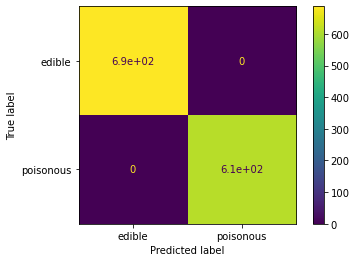

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, values_format='d', display_labels=['edible', 'poisonous'])
plt.show()